# Riešenie protokolu z predmetu signály a systémy
 Autor: Tomáš Sasák (xsasak01)
 
 Presnejší popis riešenia sa nachádza v priloženom pdf súbore.

## Riešenie úlohy 1.

In [1]:
from scipy.io import wavfile

# Open the signal
fs, s = wavfile.read("xsasak01.wav")
print ("Vzorkovacia frekvencia:", fs, "[Hz]")

# Normalization of the sound (-1,1)
s = s / 2**15
print ("Pocet vzorkov signalu:", s.size,"[Vzorok]")

# Calculation of length of the signal in sec 
s_len = s.size / fs
print ("Dlzka signalu:", s_len,"[s]")

# Calculation to get count of binary symbols
symbols_count = s.size / 16
print ("Pocet binarnych symbolov signalu:", symbols_count, "[binarny symbol]")

Vzorkovacia frekvencia: 16000 [Hz]
Pocet vzorkov signalu: 32000 [Vzorok]
Dlzka signalu: 2.0 [s]
Pocet binarnych symbolov signalu: 2000.0 [binarny symbol]


## Riešenie úlohy 2.

Prekódovaný signál má dĺžku: 2000 [binárny symbol]


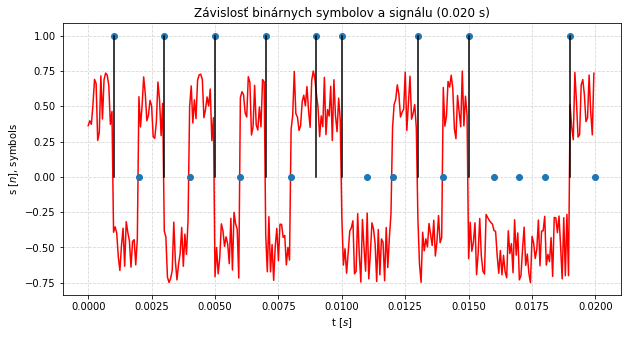

In [46]:
import numpy


symbols = numpy.array([], dtype=numpy.float)

for i in range(0, s.size, 16):
    mid = i + 7
    if mid > s.size:
        break
    if s[mid] > 0:
        symbols = numpy.append(symbols, 1)
    elif s[mid] < 0:
        symbols = numpy.append(symbols, 0)
    
print("Prekódovaný signál má dĺžku:", symbols.size, "[binárny symbol]")
# Set up the plot


# Time based on one sample: 1 / fs
one_sample = 1 / fs

# Calculation, of how much samples can be represented in 0.020ms
samples_20ms = int(0.020 * fs)

# Create array, which represents axis X (0.000 - 0.020)
axis_x = numpy.array([], dtype=numpy.float)

# Create the axis
for i in range(0, samples_20ms):
    axis_x = numpy.append(axis_x, (i * one_sample))

# Plot out the .wav sound for 0.020 s

# Also need to plot out the 
for i in range(0,samples_20ms):
    if i % 16 == 0:
        index = int(i / 15)
        plt.stem([(i + 16) * one_sample], [symbols[index]], 'black')
        


## Riešenie úlohy 3.

Filter je stabilný


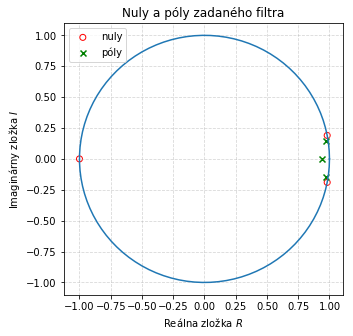

In [3]:
import scipy.signal as sp

# Filter
B = [0.0192, -0.0185, -0.0185, 0.0192]
A = [1.0000, -2.8870, 2.7997, -0.9113]

# Calculation of zeros, poles
zeros, poles, gain = sp.tf2zpk(B, A)

# Filter is stable if absolute value of all poles is less than 1
is_stable = (poles.size == 0) or numpy.all(numpy.abs(poles) < 1)

if is_stable:
    print ("Filter je stabilný")
else:
    print ("Filter nieje stabilný")




## Riešenie úlohy 4.

Tento filter je dolná priepusť. 

Mezná frekvencia filtra:  [484.375] [Hz]


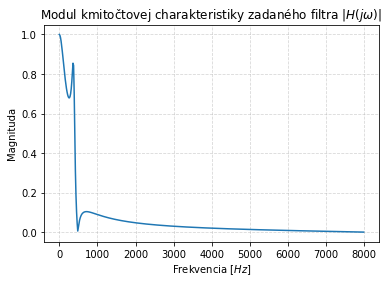

In [4]:
w, H = sp.freqz(B, A)
H = numpy.abs(H)
w = w / 2 / numpy.pi * fs


print("Tento filter je dolná priepusť.", "\n")

# Cutoff frequency is located as local minimum of range <0, 1000> Hz
# Get first 64 members of H, rest are useless 
H_copy = H[:64]
# Get minimum from this 64 members
H_min = H_copy.min()
# Find the index of the minimum
H_min_index = numpy.where(H_copy == H_min)
print("Mezná frekvencia filtra: ", w[H_min_index], "[Hz]")

## Riešenie úlohy 5.

Signál ss[n] budem posúvať o 16 [vzorok] dolava


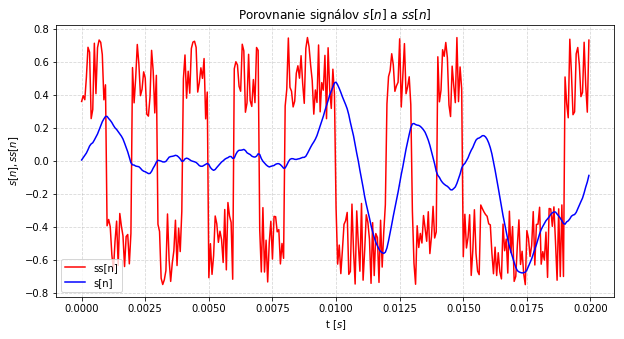

In [5]:
# filter out ss
ss = sp.lfilter(B, A, s)

# From graph I see that the ss[n] is shifted by nearly half of the axis_x part, aprox. 0.001s
# Need to shift the ss[n] by 0.00125 [s]
shift_samples_count = int(fs * 0.001)
print ('Signál ss[n] budem posúvať o', shift_samples_count, "[vzorok]", "dolava")

## Riešenie úlohy 6.

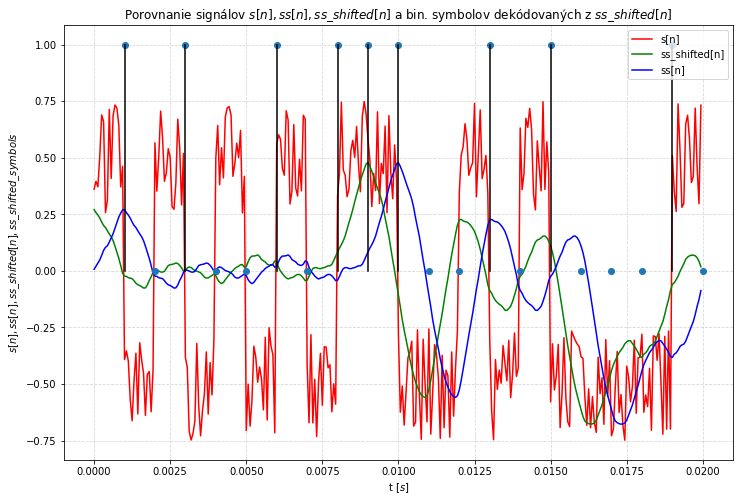

In [6]:
# shifting ss[n] by 16 samples
ss_shifted = ss[shift_samples_count:]

# decode shifted symbols 
ss_shifted_symbols = numpy.array([], dtype = numpy.float)
for i in range(0, ss_shifted.size, 16):
    mid = i + 7
    if mid > s.size:
        break
    if ss_shifted[mid] > 0:
        ss_shifted_symbols = numpy.append(ss_shifted_symbols, 1)
    elif ss_shifted[mid] < 0:
        ss_shifted_symbols = numpy.append(ss_shifted_symbols, 0)


## Riešenie úlohy 7.

In [7]:
# Also need to cut one symbol away from symbols decoded from s[n]
symbols = symbols[:1999]

xor_result = numpy.logical_xor(symbols, ss_shifted_symbols)
xor_result = numpy.count_nonzero(xor_result)
print("Počet chybných bitov vzniknutých posunom:", xor_result, "[vzorok]")

result = (xor_result / symbols.size) * 100
print("Symboly dekódované ss_shifted majú chybovosť:", result, "%")

Počet chybných bitov vzniknutých posunom: 95 [vzorok]
Symboly dekódované ss_shifted majú chybovosť: 4.752376188094047 %


## Riešenie úlohy 8.

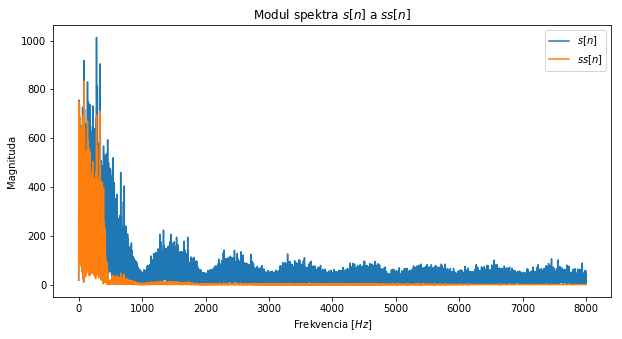

In [18]:
from numpy.fft import fft, fftfreq

# Calculate FFT
fft_s = fft(s)
fft_ss = fft(ss)

# Get FFT frequencies
fq_ss = fftfreq(fft_ss.size, d = one_sample)
fq_s = fftfreq(fft_s.size,d = one_sample)

## Riešenie úlohy 9.

Kontrola integrálu p(x): 1.0000000000000002


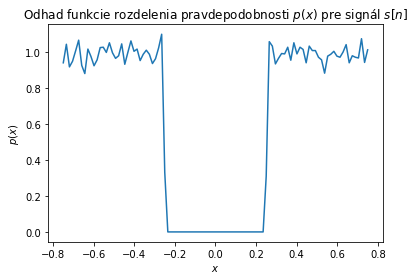

In [21]:
s_min = numpy.min(s)
s_max = numpy.max(s)
n_aprx = 100 # trying to approximate 100 values

# create x axis
x = numpy.linspace(s_min, s_max, num = n_aprx)

# get distance between two x points
bin_distance = numpy.abs(x[2] - x[1])

# create histogram
hist, _ = numpy.histogram(s, n_aprx)


# histogram / number of symbols / distance between two bins
px = hist / s.size / bin_distance

plt.title('Odhad funkcie rozdelenia pravdepodobnosti $p(x)$ pre signál $s[n]$')
plt.plot(x, px)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')

plt.savefig('uloha9.pdf')

print('Kontrola integrálu p(x):',numpy.sum(px * bin_distance))

## Riešenie úlohy 10.

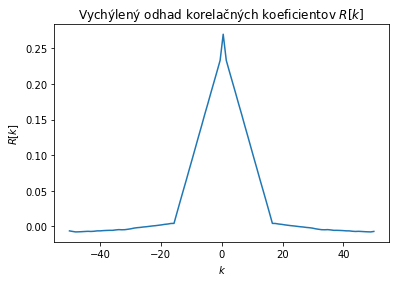

In [43]:
# Set up the x axis from -50 to 50, with 100 samples)
k = numpy.linspace(-50, 50,100)


# Make full correlation
corr = numpy.correlate(s, s, 'full') / s.size

# Calculate indexes
wanted_correlation_start_index = int(((corr.size - 1) / 2) - 50)
wanted_correlation_end_index = int(((corr.size - 1) / 2 + 50))
wanted_correlation = corr[wanted_correlation_start_index : wanted_correlation_end_index]

plt.plot(k, wanted_correlation)
plt.title('Vychýlený odhad korelačných koeficientov $R[k]$')
plt.xlabel('$k$')
plt.ylabel('$R[k]$')
plt.savefig('uloha10.pdf')

## Riešenie úlohy 11.

In [44]:
# r[0] is exact middle in -50 to 50
r0 = int(wanted_correlation.size / 2)

# middle + 1
r1 = int((wanted_correlation.size / 2) + 1)

# middle + 16
r16 = int((wanted_correlation.size / 2) + 16)

print('Hodnota koeficientu R[0]:', wanted_correlation[r0])
print('Hodnota koeficientu R[1]:', wanted_correlation[r1])
print('Hodnota koeficientu R[16]:', wanted_correlation[r16])

Hodnota koeficientu R[0]: 0.2696339813973755
Hodnota koeficientu R[1]: 0.23300420415043482
Hodnota koeficientu R[16]: 0.004343476471694885


## Riešenie úlohy 12.

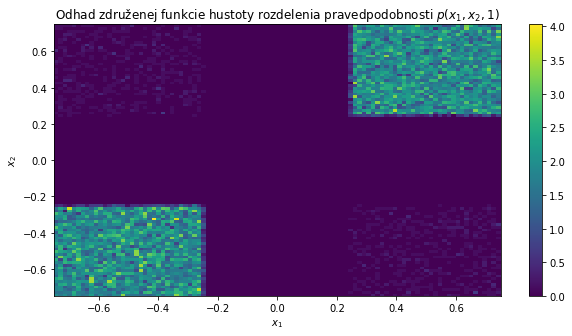

In [32]:
# remove last sample so that the signals will have same size
s_cutted = s[:31999]

# s[n + 1]
s_shifted1 = s[1:]

# Trying to approxiamte 100 values
n_aprx = 100

# Create 2d histogram
px1x2, x1_edges, x2_edges = numpy.histogram2d(s_cutted, s_shifted1, n_aprx, normed = True)

# plot it
X, Y = numpy.meshgrid(x1_edges, x2_edges)
plt.figure(figsize=(10,5))
plt.pcolormesh(X, Y, px1x2)
plt.colorbar()

plt.title('Odhad združenej funkcie hustoty rozdelenia pravedpodobnosti $p(x_1,x_2,1)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('uloha12.pdf')

## Riešenie úlohy 13.

In [33]:
# Calculate size of one bin to calculate integral
binsize = (numpy.abs(x1_edges[0] - x1_edges[1])) * (numpy.abs(x2_edges[0] - x2_edges[1]))
print('Kontrola integrálu p(x):', numpy.sum(px1x2 * binsize))

Kontrola integrálu p(x): 0.9999999999999934


## Riešenie úlohy 14.

In [45]:
# Need to correct the X and Y for r1 (100 members) 
X_correct = X[:n_aprx,:n_aprx]
Y_correct = Y[:n_aprx,:n_aprx]

# The sum of sum(X members * Y members * px1x2) * binsize results for the r0
r0 = numpy.sum(numpy.sum(X_correct * Y_correct * px1x2) * binsize)
print("R[0] z p(x1, x2, 1) je:", r0)

R[0] z p(x1, x2, 1) je: 0.23301080280423597
